Task 1 

There is a dataset of mushrooms. Based on this dataset, compare the performance between the Decision Tree and RandomForest algorithms. Use hyperparameter tuning to find the best parameters and accuracy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [14]:
data = pd.read_csv('mushrooms.csv')
X = pd.get_dummies(data.drop('class', axis=1))
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
X = data.drop("class", axis=1)
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
dt_params = {'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}

dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_


In [16]:
rf_params = {'n_estimators': [100, 200, 300],
             'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_


In [17]:
dt_pred = best_dt.predict(X_test)
rf_pred = best_rf.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Decision Tree Accuracy: {:.2f}%".format(dt_accuracy * 100))
print("Random Forest Accuracy: {:.2f}%".format(rf_accuracy * 100))


Decision Tree Accuracy: 100.00%
Random Forest Accuracy: 100.00%


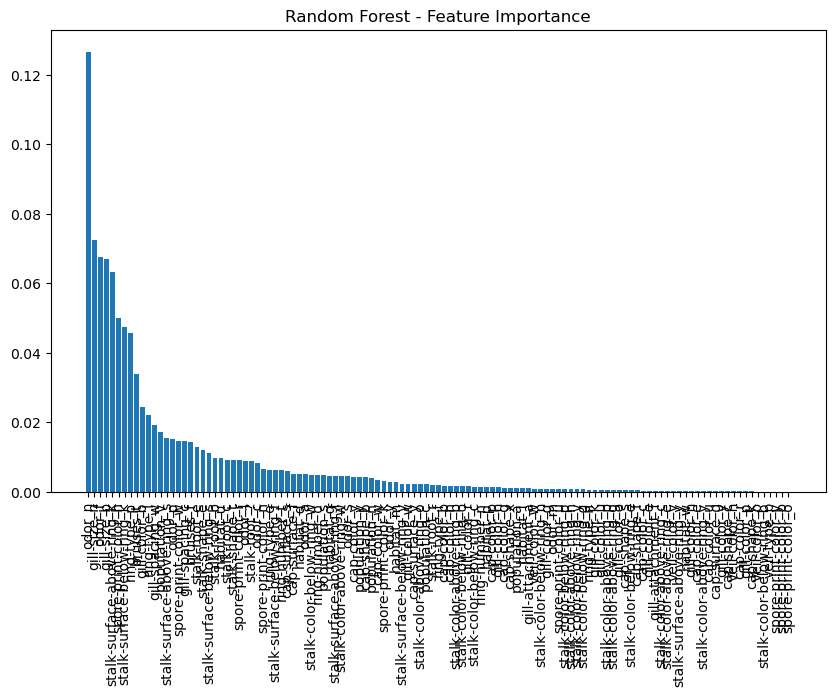

In [18]:
feature_importances = best_rf.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Random Forest - Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()


Task 2

There is a dataset of mushrooms. Based on this dataset, compare the performance between the Decision Tree and AdaBoost algorithms. Use hyperparameter tuning to find the best parameters and accuracy.

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [20]:
data = pd.read_csv('mushrooms.csv')

In [21]:
X = pd.get_dummies(data.drop('class', axis=1))
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
dt_params = {'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}

dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

In [24]:
ab_params = {'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
             'n_estimators': [50, 100, 200],
             'learning_rate': [0.1, 0.5, 1.0]}

ab_grid = GridSearchCV(AdaBoostClassifier(), ab_params, cv=5)
ab_grid.fit(X_train, y_train)
best_ab = ab_grid.best_estimator_

In [25]:
dt_pred = best_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy: {:.2f}%".format(dt_accuracy * 100))

Decision Tree Accuracy: 100.00%


In [27]:
ab_pred = best_ab.predict(X_test)
ab_accuracy = accuracy_score(y_test, ab_pred)
print("AdaBoost Accuracy: {:.2f}%".format(ab_accuracy * 100))

AdaBoost Accuracy: 100.00%


Task 3

Using the diabetes dataset, create an ensemble voting with the following algorithms:
Logistic Regression
SVM with a polynomial kernel
Decision Tree
You can explore and fine-tune hyperparameters to optimize the ensemble's performance.

In [45]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [46]:
dt = pd.read_csv('diabetes.csv')
dt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Create individual classifiers
logistic_reg = LogisticRegression(C=1.0, solver='lbfgs', max_iter=1000, random_state=42)
svm_poly = SVC(kernel='poly', degree=3, C=1.0, probability=True, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

In [50]:
# Create a Voting Classifier with 'soft' voting
ensemble_classifier = VotingClassifier(estimators=[
    ('logistic', logistic_reg),
    ('svm_poly', svm_poly),
    ('decision_tree', decision_tree)
], voting='soft')

In [53]:
# Fit the ensemble classifier on the training data
ensemble_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('svm_poly',
                              SVC(kernel='poly', probability=True,
                                  random_state=42)),
                             ('decision_tree',
                              DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [54]:
# Make predictions on the test data
y_pred = ensemble_classifier.predict(X_test)

In [55]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Accuracy: {accuracy:.2f}')

Ensemble Accuracy: 0.71
